In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

df = pd.read_csv('resources/transactions_1.csv')

df

In [ ]:
df['time'] = pd.to_datetime(df['time'], format='%Hh %M')
df

In [ ]:
df.info()

In [ ]:
dfp=df.groupby([df['time'].dt.hour, 'status']).mean()
dfp

In [105]:
dfp = dfp.reset_index()
print(dfp)

fig = px.bar(dfp, x= 'time', y = 'count', color="status", title='Transaction Frequency')
fig.update_layout(barmode='group', xaxis = dict(tickmode = 'linear'))
fig.show()


     time      status     count
0       0    approved  7.050000
1       0      denied  2.184211
2       0    refunded  1.000000
3       0    reversed  1.000000
4       1    approved  3.105263
..    ...         ...       ...
120    23      denied  5.314815
121    23      failed  1.000000
122    23  processing  2.666667
123    23    refunded  1.000000
124    23    reversed  1.888889

[125 rows x 3 columns]


In [ ]:
from prophet import Prophet

approved_status = dfp.loc[(dfp['status'] == 'reversed') | (dfp['status'] == 'failed')]
df1 = approved_status.groupby(approved_status['time']).mean()
df1 = df1.reset_index()

df_hour = pd.DataFrame({'time':[1,2,3,4,5], 'count':[0,0,0,0,0]})
df2 = df1.append(df_hour)
df3 = df2.sort_values(by=['time'])

train = df3[['time', 'count']].rename({'time':'ds', 'count':'y'}, axis='columns')
train['ds'] = pd.to_datetime(train['ds'], format='%H')

train


In [ ]:
test_info = pd.read_csv('resources/transactions_2.csv')

test_info['time'] = pd.to_datetime(test_info['time'], format='%Hh %M')


test_approved_status = test_info.loc[(test_info['status'] == 'reversed') | (test_info['status'] == 'failed')]
test_info = test_approved_status.groupby([test_info['time'].dt.hour]).mean()
test_info = test_info.reset_index()

test = test_info[['time', 'count']].rename({'time':'ds', 'count':'y'}, axis='columns')
test['ds'] = pd.to_datetime(test['ds'], format='%H')


In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
test

In [ ]:
m = Prophet(changepoint_range=0.95)

m.fit(train)

In [ ]:
future = m.make_future_dataframe(periods=18, freq='H')
future.tail(30)

In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

In [211]:
results=pd.concat([train.set_index('ds')['y'],forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]],axis=1)

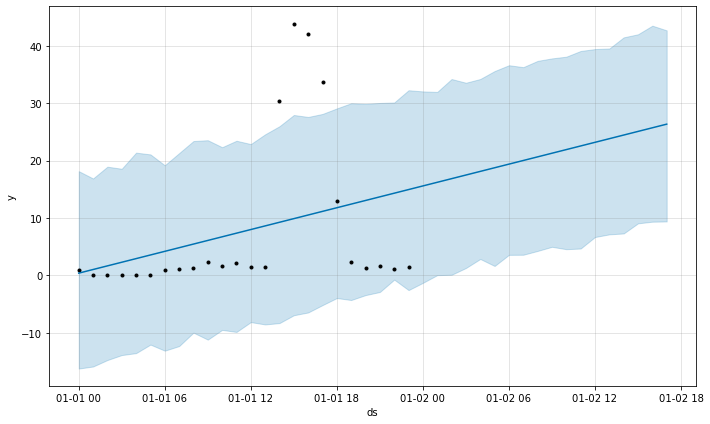

In [212]:
fig1 = m.plot(forecast)